<h2 style='color:blue' align="center">Decision Tree Classification</h2>

In [1]:
import pandas as pd

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from IPython.display import Image
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [2]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [ ]:
'''
df = pd.read_csv("DT_Numeric_tst.csv")

'''



In [3]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    for (e, c) in zip(elements, counts):
        print("Node has {} elements of Class {}".format(c, e))
    entropy = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(elements))
        ]
    )
    return entropy

In [4]:
''' cretae dataset '''
dataset={    'ExpYears': [1,5,6,10,1,6,10,10,5,10,5,1,10,10,6,5,3,6,3,5], 
             'ProfTrain':['No','Yes','No','Yes','No','Yes','Yes','Yes','Yes','No','No','Yes','Yes','No','Yes','No','No','Yes','Yes','No'],
            'ThankBooks':['No','Yes','Yes','Yes','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes'],
            'RangSalary':[450000,780000,820000,1200000,450000,820000,1200000,1200000,780000,1200000,780000,450000,1200000,1200000,820000,780000,650000,820000,650000,78000],
            'Rank': [4,3,2,1,4,2,1,1,3,1,3,4,1,1,2,3,4,2,4,3],
            'Performance':['Good','V.Good','V.Good','Excellent','Good','V.Good','Excellent' ,'Excellent','V.Good','Excellent','V.Good','Good','Excellent','Excellent','V.Good','V.Good','Good','V.Good','V.Good','V.Good']
                     }

In [5]:
'''assigne our data set into data frame'''
df=pd.DataFrame(dataset)
df

,ExpYears,ProfTrain,ThankBooks,RangSalary,Rank,Performance
0,1,No,No,450000,4,Good
1,5,Yes,Yes,780000,3,V.Good
2,6,No,Yes,820000,2,V.Good
3,10,Yes,Yes,1200000,1,Excellent
4,1,No,No,450000,4,Good
5,6,Yes,Yes,820000,2,V.Good
6,10,Yes,Yes,1200000,1,Excellent
7,10,Yes,Yes,1200000,1,Excellent
8,5,Yes,Yes,780000,3,V.Good
9,10,No,Yes,1200000,1,Excellent


In [6]:
df=df.sort_values(by=['ExpYears'])
df

,ExpYears,ProfTrain,ThankBooks,RangSalary,Rank,Performance
0,1,No,No,450000,4,Good
11,1,Yes,Yes,450000,4,Good
4,1,No,No,450000,4,Good
16,3,No,Yes,650000,4,Good
18,3,Yes,Yes,650000,4,V.Good
15,5,No,Yes,780000,3,V.Good
10,5,No,Yes,780000,3,V.Good
8,5,Yes,Yes,780000,3,V.Good
19,5,No,Yes,78000,3,V.Good
1,5,Yes,Yes,780000,3,V.Good


In [7]:
entropy_before_split = entropy(df.Performance)
print ("Initial Entropy = {}".format(entropy_before_split))

Node has 6 elements of Class Excellent
Node has 4 elements of Class Good
Node has 10 elements of Class V.Good
Initial Entropy = 1.4854752972273344


In [8]:
split_values = np.arange(3,10,1)
split_values

array([3, 4, 5, 6, 7, 8, 9])

In [9]:
left_node_data = df.loc[df.ExpYears < split_values[0]]
right_node_data = df.loc[df.ExpYears > split_values[0]]

In [10]:
left_node_data

,ExpYears,ProfTrain,ThankBooks,RangSalary,Rank,Performance
0,1,No,No,450000,4,Good
11,1,Yes,Yes,450000,4,Good
4,1,No,No,450000,4,Good


In [11]:
right_node_data

,ExpYears,ProfTrain,ThankBooks,RangSalary,Rank,Performance
15,5,No,Yes,780000,3,V.Good
10,5,No,Yes,780000,3,V.Good
8,5,Yes,Yes,780000,3,V.Good
19,5,No,Yes,78000,3,V.Good
1,5,Yes,Yes,780000,3,V.Good
5,6,Yes,Yes,820000,2,V.Good
14,6,Yes,Yes,820000,2,V.Good
2,6,No,Yes,820000,2,V.Good
17,6,Yes,Yes,820000,2,V.Good
6,10,Yes,Yes,1200000,1,Excellent


In [12]:
def calc_info_gain_numeric(df, left, right, entropy_before_split, split_values):
    print("Split Value = {} \n".format(split_values))
    total_elements = df.shape[0]
    print("Left Node")
    ent_left = entropy(left)
    print("Entropy of Left Node {} \n".format(ent_left))
    print("Right Node")
    ent_right = entropy(right)
    print("Entropy of Right Node {} \n".format(ent_right))
    weighted_entropy = ((left.shape[0] / total_elements) * ent_left) + (
        (right.shape[0] / total_elements) * ent_right
    )
    info_gain = entropy_before_split - weighted_entropy
    print("Info gain at split {} is {} \n".format(split_values, info_gain))
    return info_gain

In [13]:
calc_info_gain_numeric(
    df, left_node_data.ExpYears, right_node_data.ExpYears, entropy_before_split, split_values[0]
)

Split Value = 3 

Left Node
Node has 3 elements of Class 1
Entropy of Left Node 0.0 

Right Node
Node has 5 elements of Class 5
Node has 4 elements of Class 6
Node has 6 elements of Class 10
Entropy of Right Node 1.565596230357602 

Info gain at split 3 is 0.31127812445913294 



0.31127812445913294

In [15]:
info_gains = []
for sp_value in split_values:
    left_data = df.loc[df.ExpYears < sp_value]
    right_data = df.loc[df.ExpYears > sp_value]
    info_gains.append(
        calc_info_gain_numeric(
            df, left_data.ExpYears, right_data.ExpYears, entropy_before_split, sp_value
        )
    )

Split Value = 3 

Left Node
Node has 3 elements of Class 1
Entropy of Left Node 0.0 

Right Node
Node has 5 elements of Class 5
Node has 4 elements of Class 6
Node has 6 elements of Class 10
Entropy of Right Node 1.565596230357602 

Info gain at split 3 is 0.31127812445913294 

Split Value = 4 

Left Node
Node has 3 elements of Class 1
Node has 2 elements of Class 3
Entropy of Left Node 0.9709505944546686 

Right Node
Node has 5 elements of Class 5
Node has 4 elements of Class 6
Node has 6 elements of Class 10
Entropy of Right Node 1.565596230357602 

Info gain at split 4 is 0.06854047584546574 

Split Value = 5 

Left Node
Node has 3 elements of Class 1
Node has 2 elements of Class 3
Entropy of Left Node 0.9709505944546686 

Right Node
Node has 4 elements of Class 6
Node has 6 elements of Class 10
Entropy of Right Node 0.9709505944546686 

Info gain at split 5 is 0.757262351386333 

Split Value = 6 

Left Node
Node has 3 elements of Class 1
Node has 2 elements of Class 3
Node has 5 el

In [16]:
info_gains.index(max(info_gains))

2

In [17]:
split_values[info_gains.index(max(info_gains))]

5

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [19]:
''' split input and output '''
inputs = df.drop('Performance',axis='columns')

In [20]:
target = df['Performance']

In [21]:
inputs

,ExpYears,ProfTrain,ThankBooks,RangSalary,Rank
0,1,No,No,450000,4
11,1,Yes,Yes,450000,4
4,1,No,No,450000,4
16,3,No,Yes,650000,4
18,3,Yes,Yes,650000,4
15,5,No,Yes,780000,3
10,5,No,Yes,780000,3
8,5,Yes,Yes,780000,3
19,5,No,Yes,78000,3
1,5,Yes,Yes,780000,3


In [22]:
'''create dummy values for categrical input for proftrain'''
input_dum1=pd.get_dummies(inputs.ProfTrain,prefix='ProfTrain')

In [23]:
input_dum1

,ProfTrain_No,ProfTrain_Yes
0,1,0
11,0,1
4,1,0
16,1,0
18,0,1
15,1,0
10,1,0
8,0,1
19,1,0
1,0,1


In [24]:
'''create dummy values for categrical input for ThankBooks'''
input_dum2=pd.get_dummies(inputs.ThankBooks,prefix='ThankBooks')

In [25]:
input_dum2

,ThankBooks_No,ThankBooks_Yes
0,1,0
11,0,1
4,1,0
16,0,1
18,0,1
15,0,1
10,0,1
8,0,1
19,0,1
1,0,1


In [26]:
input_dummy=pd.concat([inputs,input_dum1,input_dum2],axis='columns')

In [ ]:
input_dummy

In [27]:
input_n = input_dummy.drop(['ProfTrain','ThankBooks'],axis='columns')

In [ ]:
input_n

In [28]:
target

0          Good
11         Good
4          Good
16         Good
18       V.Good
15       V.Good
10       V.Good
8        V.Good
19       V.Good
1        V.Good
5        V.Good
14       V.Good
2        V.Good
17       V.Good
6     Excellent
3     Excellent
12    Excellent
13    Excellent
7     Excellent
9     Excellent
Name: Performance, dtype: object

In [29]:
clf.fit(input_n,target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
clf = clf.fit(input_n,target)

In [31]:
clf.score(input_n,target)

1.0

In [32]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

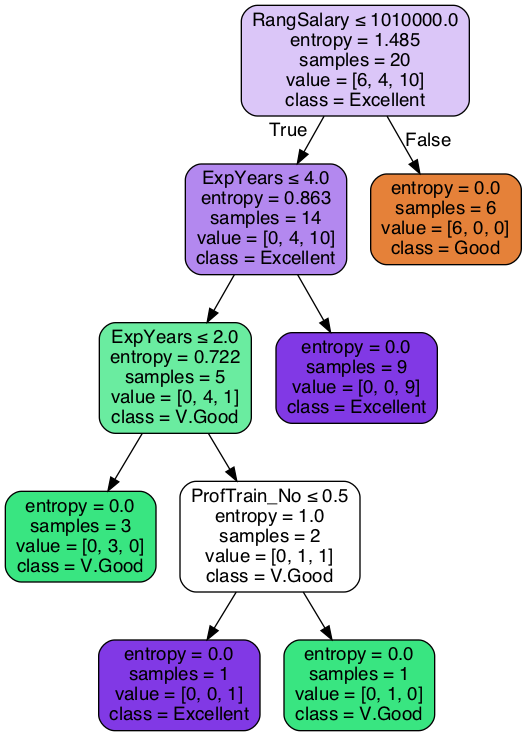

In [33]:
plot_decision_tree(clf, input_n.columns,["Good", "V.Good","Excellent"])




# what is the performance for the employee with 7 years exp and has no thanks books and with no prof training and his salary 100000 and his rank 4

In [36]:
input_n.columns

Index(['ExpYears', 'RangSalary', 'Rank', 'ProfTrain_No', 'ProfTrain_Yes',
       'ThankBooks_No', 'ThankBooks_Yes'],
      dtype='object')

In [38]:
clf.predict([[7,100000,4,1,0,1,0]])

array(['V.Good'], dtype=object)